# Tmall 订单数据分析
## 数据说明
数据来源：[和鲸社区](https://www.heywhale.com/home/)

3份互不相关的电商数据集：

`tmall_order_report.cvs` (天猫订单表)

`双十一淘宝美妆数据.csv`

`日化.xlsx`


### Part 1
mall_order_report.csv ：约2.8万条订单数据，可供挖掘的省份（收货地址），指标则有销售量、销售额、退款金额、退货率、成交率、地区分布、下单时间趋势等

#### 1.1 数据处理

In [1]:
import pandas as pd

ori_data = pd.read_csv('tmall_order_report.csv')
ori_data.head(5)

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8


In [2]:
ori_data.describe()

,订单编号,总金额,买家实际支付金额,退款金额
count,28010.000000,28010.000000,28010.000000,28010.000000
mean,14005.500000,106.953253,67.921712,20.433271
std,8085.934856,1136.587094,151.493434,71.501963
min,1.000000,1.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,0.000000
50%,14005.500000,75.000000,45.000000,0.000000
75%,21007.750000,119.000000,101.000000,0.000000
max,28010.000000,188320.000000,16065.000000,3800.000000


In [3]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


In [4]:
# 规范列名（去空格）
ori_data.columns = ori_data.columns.str.strip()  
ori_data.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址', '订单创建时间', '订单付款时间', '退款金额'], dtype='object')

In [5]:
# 判断是否存在重复行
'''
DataFrame.duplicated(subset=None, keep='first')
- subset: column label or sequence of labels
- keep: 'first'(keep first False),'last'(keep last False), False(all True)
'''
print(ori_data[ori_data.duplicated()].count())
#（可用drop_duplicated()去重）

# 统计各项属性null数据量
print(ori_data.isnull().sum())

订单编号        0
总金额         0
买家实际支付金额    0
收货地址        0
订单创建时间      0
订单付款时间      0
退款金额        0
dtype: int64
订单编号           0
总金额            0
买家实际支付金额       0
收货地址           0
订单创建时间         0
订单付款时间      3923
退款金额           0
dtype: int64


In [37]:
# 将时间属性转换为时间格式对象
# to_datetime()  convert data to pd.datatime obj

ori_data['订单创建时间'] = pd.to_datetime(ori_data['订单创建时间'])
ori_data['订单付款时间'] = pd.to_datetime(ori_data['订单付款时间'])


0       2020-02-21 00:00:00
1       2020-02-20 23:59:54
2       2020-02-20 23:59:35
3       2020-02-20 23:58:34
4       2020-02-20 23:57:04
                ...        
28005   2020-02-27 00:01:00
28006   2020-02-27 00:00:18
28007   2020-02-27 00:00:17
28008   2020-02-27 00:00:09
28009   2020-02-27 00:00:06
Name: 订单创建时间, Length: 28010, dtype: datetime64[ns]

#### 1.2 数据可视化与数据分析
**总体分析**

In [76]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

stat_res = {}

stat_res['订单总数'] = ori_data['订单编号'].count()
stat_res['已完成订单数'] = ori_data['订单编号'][ori_data['订单付款时间'].notnull()].count()
stat_res['未付款订单数'] = ori_data['订单编号'][ori_data['订单付款时间'].isnull()].count()
stat_res['总订单金额'] = ori_data['总金额'][ori_data['订单付款时间'].notnull()].sum()
stat_res['总退款金额'] = ori_data['退款金额'].sum()
stat_res['总实际收入金额'] = ori_data['买家实际支付金额'][ori_data['订单付款时间'].notnull()].sum()

for k, v in stat_res.items():
    print(k, '%.2f'%v)

订单总数 28010.00
已完成订单数 24087.00
未付款订单数 3923.00
总订单金额 2474823.07
总退款金额 572335.92
总实际收入金额 1902487.15


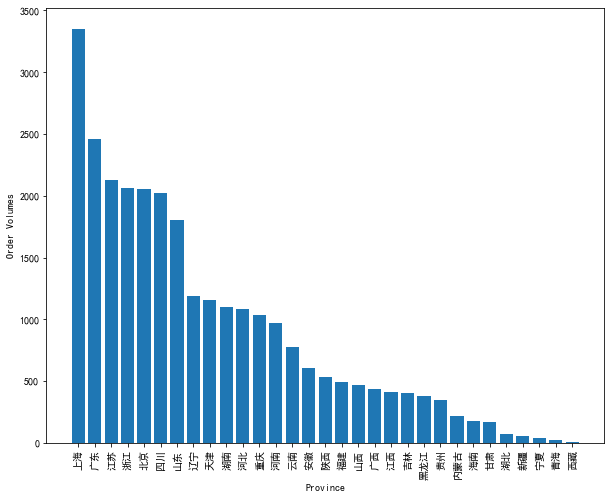

In [72]:
# 清理省份名称数据
ori_data['收货地址'] = ori_data['收货地址'].str.replace('自治区|维吾尔|省|壮族|回族', '', regex=True)

res0 = ori_data['收货地址'].groupby(ori_data['收货地址']).agg('count').to_dict()

res0 = dict(sorted(res0.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(10, 8))
plt.bar(res0.keys(), res0.values())
plt.xticks(rotation=90)
plt.xlabel('Province')
plt.ylabel('Order Volumes')
plt.show()

**时间趋势分析**

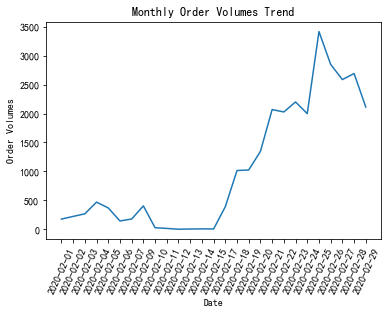

In [78]:
res1 = ori_data.groupby(ori_data['订单创建时间'].apply(lambda x: x.strftime('%Y-%m-%d'))).agg({'订单创建时间':'count'}).to_dict()['订单创建时间']

# groupby()
# apply()
# strftime()
# agg()
# to_dict()

plt.plot(res1.keys(), res1.values())
plt.xticks(rotation=65)
plt.xlabel('Date')
plt.ylabel('Order Volumes')
plt.title('Monthly Order Volumes Trend')
plt.show()

从上图可见，2月份上半月的订单较少，从2月14日订单开始明显上涨

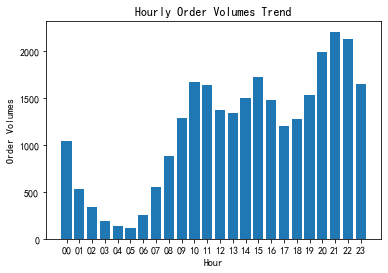

In [77]:
res2 = ori_data.groupby(ori_data['订单创建时间'].apply(lambda x: x.strftime('%H'))).agg({'订单编号':'count'}).to_dict()['订单编号']


plt.bar(res2.keys(), res2.values())
plt.title('Hourly Order Volumes Trend')
plt.xlabel('Hour')
plt.ylabel('Order Volumes')
plt.show()

上图表明的一天中每个小时的下单数量变化趋势，一天中在10点，15点，21点出现了下单的高峰点，其中晚上时间段（20点至22点）下单量明显高于其他时间段。因此根据下单的时间规律，可在高峰期合理安排客服人员，保证客服回复速度，从而提高服务质量。

### Part 2
双十一淘宝美妆数据.csv：数据集是美妆店铺的双十一销售数据,约2.75万条数据，可以挖掘的纬度有日期、店铺，指标则有销售量、销售额、评论数等。

#### 2.1 数据理解与处理


In [2]:
import pandas as pd

tmall_11_makeup_data = pd.read_csv('双十一淘宝美妆数据.csv')
tmall_11_makeup_data.head()

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂


In [3]:
tmall_11_makeup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     25244 non-null  float64
 5   comment_count  25244 non-null  float64
 6   店名             27598 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


In [4]:
# 数据查重
print(tmall_11_makeup_data[tmall_11_makeup_data.duplicated()].count())


update_time      86
id               86
title            86
price            86
sale_count       82
comment_count    82
店名               86
dtype: int64


In [5]:
# 数据去重，重建索引
tmall_11_makeup_data.drop_duplicates(inplace=True)
tmall_11_makeup_data.reset_index(drop=True, inplace=True)

In [6]:
# 检测空值
tmall_11_makeup_data.isnull().sum()  # sale_count comment_count存在空值

update_time         0
id                  0
title               0
price               0
sale_count       2350
comment_count    2350
店名                  0
dtype: int64

In [7]:
# 填补空值
tmall_11_makeup_data.fillna(0, inplace=True)
# 检测空值
# tmall_11_makeup_data.isnull().sum()

# 添加销售总额
tmall_11_makeup_data['sale_amount'] = tmall_11_makeup_data['sale_count']*tmall_11_makeup_data['price']

tmall_11_makeup_data[tmall_11_makeup_data['sale_amount']>0].sort_values(by=['sale_count'], ascending=False).head()

,update_time,id,title,price,sale_count,comment_count,店名,sale_amount
17026,2016/11/14,A24304992630,德国妮维雅男士洗面奶控油祛痘印保湿去黑头去油清洁面乳液护肤品,42.0,1923160.0,197949.0,妮维雅,80772720.0
17126,2016/11/13,A24304992630,德国妮维雅男士洗面奶控油祛痘印保湿去黑头去油清洁面乳液护肤品,37.9,1921582.0,198774.0,妮维雅,72827957.8
17228,2016/11/12,A24304992630,德国妮维雅男士洗面奶控油祛痘印保湿去黑头去油清洁面乳液护肤品,37.9,1920083.0,199062.0,妮维雅,72771145.7
17339,2016/11/11,A24304992630,2瓶更划算*妮维雅男士洗面奶控油祛痘印保湿去黑头去油洁面乳护肤,35.0,1886100.0,199532.0,妮维雅,66013500.0
17470,2016/11/10,A24304992630,德国妮维雅男士洗面奶控油祛痘印保湿去黑头去油清洁面乳液护肤品,42.0,1827562.0,200154.0,妮维雅,76757604.0


In [8]:
# 日期格式化
tmall_11_makeup_data['update_time'] = pd.to_datetime(tmall_11_makeup_data['update_time']).apply(lambda x: x.strftime('%Y-%m-%d'))

In [9]:
tmall_11_makeup_data['店名'].unique()

array(['自然堂', '资生堂', '植村秀', '悦诗风吟', '玉兰油', '雅漾', '雅诗兰黛', '雪花秀', '相宜本草',
       '薇姿', '倩碧', '欧珀莱', '欧莱雅', '妮维雅', '蜜丝佛陀', '美加净', '美宝莲', '兰芝', '兰蔻',
       '娇兰', '佰草集', 'SKII'], dtype=object)

#### 2.2 数据可视化与分析

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

stat_sale_temp = tmall_11_makeup_data.groupby(tmall_11_makeup_data['店名']).agg({'sale_count': 'sum', 'sale_amount':'sum'}).to_dict()

sale_count_dict = stat_sale_temp['sale_count']

sale_count_dict = dict(sorted(sale_count_dict.items(), key=lambda x: x[1]))
sale_count_dict = filter('')

sale_amount_dict = stat_sale_temp['sale_amount']
sale_count_dict = dict(sorted(sale_count_dict.items(), key=lambda x: x[1]))


print(sale_amount_dict)



# res0 = dict(filter(lambda x: x[1] != 0, res1.items()))
# res0 = dict(sorted(res0.items(), key=lambda x: x[1]))

# fig = plt.figure(figsize=(8,6))
# x = list(res0.keys())
# y = list(res0.values())

# plt.barh(x, y)
# plt.ylabel('Brand')
# plt.xlabel('Total Sale')

# for i in range(len(y)):
#     plt.annotate('{:.2f}百万'.format(y[i]/1000000), (y[i]+0.1, i-0.1))       # 设置数据的标注
# plt.show()
# udemy

{'SKII': 0.0, '植村秀': 0.0, '玉兰油': 0.0, '娇兰': 75601800.0, '资生堂': 166722560.0, '薇姿': 222742503.0, '雪花秀': 362906106.0, '美加净': 385191839.27, '欧珀莱': 1119465071.0, '雅漾': 1120840024.0, '兰蔻': 1647341010.0, '倩碧': 1999199220.0, '蜜丝佛陀': 2082466315.7, '妮维雅': 2200167505.57, '兰芝': 2525665625.0, '自然堂': 2941152853.5, '雅诗兰黛': 3040251794.0, '悦诗风吟': 3386962445.0, '美宝莲': 3531516325.0, '佰草集': 4018679349.8, '欧莱雅': 5312478542.0, '相宜本草': 6145791045.42}
